# Filtering Data yang Diambil dari Twitter berdasarkan Nilai Thresold

**Melakukan import Library**

Pertama, lakukan import library yang dibutuhkan berikut:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage as ndi

from matplotlib.widgets import Slider, Button, RadioButtons

import math
import operator
import glob

**Melakukan Persiapan Data**

Membaca file CSV yang berisi scraping data Twitter pada periode sebelum terjadi COVID-19

In [ ]:
tweet_data_before_covid_df = pd.DataFrame()

for files in glob.glob("data/noncovid/*.csv"):
    tweet_data_before_covid_files = pd.read_csv(files)
    tweet_data_before_covid_df = tweet_data_before_covid_df.append(tweet_data_before_covid_files)
    
#menghapus rows yang redudant
tweet_data_before_covid_df = pd.DataFrame.drop_duplicates(tweet_data_before_covid_df)

Membaca file CSV yang berisi scraping data Twitter pada periode saat terjadi COVID-19

In [ ]:
tweet_data_during_covid_df = pd.DataFrame()

for files in glob.glob("data/covid/*.csv"):
    tweet_data_during_covid_files = pd.read_csv(files)
    tweet_data_during_covid_df = tweet_data_during_covid_df.append(tweet_data_during_covid_files)
    
#menghapus rows yang redudant
tweet_data_during_covid_df = pd.DataFrame.drop_duplicates(tweet_data_during_covid_df)

# Melakukan Analisis Data Twitter

Klasifikasi data ini menggunakan data Twitter dengan dua periode waktu, yaitu:
1. Periode Sebelum Pandemi COVID-19 (14-12-2019 sampai 13-03-2020)
1. Periode Saat Pandemi COVID-19 (14-03-2020 sampai 14-06-2020)

Deklarasi date_start dan date_end untuk memetakan periode sebelum COVID-19

In [ ]:
from datetime import date

date_start_before_covid = date(2019,12,13)
date_end_before_covid = date(2020,3,13)

date_start_convert_before_covid = date_start_before_covid.strftime('%d%m%Y')
date_end_convert_before_covid = date_end_before_covid.strftime('%d%m%Y')

Deklarasi date_start dan date_end untuk memetakan periodenya

In [ ]:
from datetime import date

date_start_during_covid = date(2020,3,14)
date_end_during_covid = date(2020,6,13)

date_start_convert_during_covid = date_start_during_covid.strftime('%d%m%Y')
date_end_convert_during_covid = date_end_during_covid.strftime('%d%m%Y')

Deklarasi function untuk menampilkan column value setiap grafik

In [ ]:
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 1.000*height, 
             '%d'%int(height),
             ha = 'center', va = 'bottom', rotation = 0, 
    fontsize=9)

        
def grouped_autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

Deklarasi function untuk menampilkan keterangan grafik

In [ ]:
def graphics_explanation(xlabel, ylabel, title):
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

**Berdasarkan Jumlah Pengguna per Periode**

**1. Total Jumlah Pengguna** 

Jumlah pengguna sebelum pandemi COVID-19 dan saat pandemi COVID-19

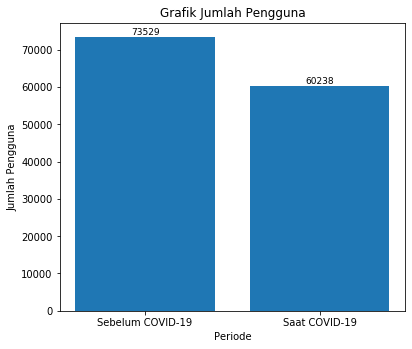

In [ ]:
user_before_covid_count = len(pd.unique(tweet_data_before_covid_df['username']))
user_during_covid_count = len(pd.unique(tweet_data_during_covid_df['username']))

user_period = ['Sebelum COVID-19','Saat COVID-19']
user_count = [user_before_covid_count, user_during_covid_count]

user_count_bar = plt.bar(user_period,user_count, align='center')
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=1.1)

autolabel(user_count_bar)
graphics_explanation('Periode', 'Jumlah Pengguna', 'Grafik Jumlah Pengguna')

plt.show()

**2. Persentase Jumlah Pengguna**

Melihat perbandingan persentase dari dua periode tersebut

In [ ]:
user_count_before_covid_percentage = (user_before_covid_count/(user_before_covid_count+user_during_covid_count)*100)
user_count_during_covid_percentage = (user_during_covid_count/(user_before_covid_count+user_during_covid_count)*100)

print('')
print('Persentase Pengguna sebelum Pandemi COVID-19:', round(user_count_before_covid_percentage, 2),'%')
print('Persentase Pengguna saat Pandemi COVID-19:', round(user_count_during_covid_percentage, 2),'%')


Persentase Pengguna sebelum Pandemi COVID-19: 54.97 %
Persentase Pengguna saat Pandemi COVID-19: 45.03 %


**Berdasarkan Jumlah Tweet per Periode**

**1. Total Jumlah Tweet**

Jumlah postingan sebelum pandemi COVID-19 dan saat pandemi COVID-19

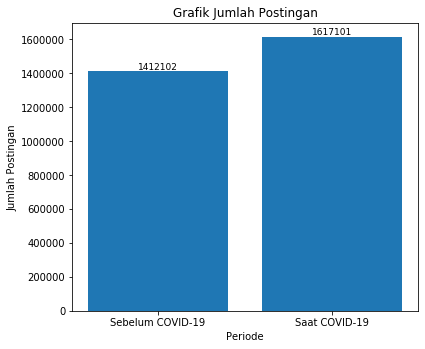

In [ ]:
post_before_covid_count = len(tweet_data_before_covid_df.index)
post_during_covid_count = len(tweet_data_during_covid_df.index)

post_period = ['Sebelum COVID-19','Saat COVID-19']
post_count = [post_before_covid_count, post_during_covid_count]

post_count_bar = plt.bar(post_period,post_count, align='center')
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=1.1)

autolabel(post_count_bar)
graphics_explanation('Periode', 'Jumlah Postingan', 'Grafik Jumlah Postingan')

plt.show()

**2. Persentase Jumlah Postingan**

Melihat perbandingan persentase psotingan dari dua periode tersebut

In [ ]:
post_count_before_covid_percentage = (post_before_covid_count/(post_before_covid_count+post_during_covid_count)*100)
post_count_during_covid_percentage = (post_during_covid_count/(post_before_covid_count+post_during_covid_count)*100)

print('')
print('Persentase Postingan sebelum Pandemi COVID-19:', round(post_count_before_covid_percentage, 2),'%')
print('Persentase Postingan saat Pandemi COVID-19:', round(post_count_during_covid_percentage, 2),'%')


Persentase Postingan sebelum Pandemi COVID-19: 46.62 %
Persentase Postingan saat Pandemi COVID-19: 53.38 %


**Klasifikasi Data Berdasarkan Waktu**

**a. Berdasarkan Hari**

Menghitung jumlah postingan per-hari sebelum pandemi COVID-19

In [ ]:
#deklarasi sebuah dataframe
tweet_each_day_before_covid_df = pd.DataFrame([])

#jumlahkan postingan yang berada setiap perhari 
tweet_each_day_before_covid = tweet_data_before_covid_df.groupby("date")["date"].count()

#masukkan data jumlah psotingan setiap hari ke dataframe
tweet_each_day_before_covid_df = pd.DataFrame(tweet_each_day_before_covid)
tweet_each_day_before_covid_df = tweet_each_day_before_covid_df.rename(columns={'date': 'tweet_count'})

#buat sebuah list yang berisi persentase postingan setiap harinya
tweet_each_day_before_covid_percentage = []
for i, row in tweet_each_day_before_covid_df.iterrows():
    tweet_each_day_before_covid_percentage.append(round((row['tweet_count']/tweet_each_day_before_covid_df['tweet_count'].sum())*100,2))

#tambahkan list persentase postingan ke dataframe
tweet_each_day_before_covid_df['percentage (%)'] = tweet_each_day_before_covid_percentage

#save to csv
tweet_each_day_before_covid_df.to_csv('data/filter/noncovid/tweet_each_date_before_covid_{}-{}.csv'.format(date_start_convert_during_covid, date_end_convert_during_covid), index=True)

tweet_each_day_before_covid_df

,tweet_count,percentage (%)
date,,
2019-12-14,12599,0.89
2019-12-15,15399,1.09
2019-12-16,15399,1.09
2019-12-17,16499,1.17
2019-12-18,15291,1.08
...,...,...
2020-03-10,16445,1.16
2020-03-11,17307,1.23
2020-03-12,17759,1.26


Menghitung jumlah postingan per-hari saat pandemi COVID-19

In [ ]:
#deklarasi sebuah dataframe
tweet_each_day_during_covid_df = pd.DataFrame([])

#jumlahkan postingan yang berada setiap perhari 
tweet_each_day_during_covid = tweet_data_during_covid_df.groupby("date")["date"].count()

#masukkan data jumlah psotingan setiap hari ke dataframe
tweet_each_day_during_covid_df = pd.DataFrame(tweet_each_day_during_covid)
tweet_each_day_during_covid_df = tweet_each_day_during_covid_df.rename(columns={'date': 'tweet_count'})

#buat sebuah list yang berisi persentase postingan setiap harinya
tweet_each_day_during_covid_percentage = []
for i, row in tweet_each_day_during_covid_df.iterrows():
    tweet_each_day_during_covid_percentage.append(round((row['tweet_count']/tweet_each_day_during_covid_df['tweet_count'].sum())*100,2))

#tambahkan list persentase postingan ke dataframe
tweet_each_day_during_covid_df['percentage (%)'] = tweet_each_day_during_covid_percentage

#save to csv
tweet_each_day_during_covid_df.to_csv('data/filter/covid/tweet_each_date_during_covid_{}-{}.csv'.format(date_start_convert_during_covid, date_end_convert_during_covid), index=True)

tweet_each_day_during_covid_df

,tweet_count,percentage (%)
date,,
2020-03-14,19201,1.19
2020-03-15,19759,1.22
2020-03-16,20151,1.25
2020-03-17,18868,1.17
2020-03-18,18940,1.17
...,...,...
5/27/20,15665,0.97
5/28/20,15571,0.96
5/29/20,15113,0.93


Menambahkan kolom date ke dataframe **tweet_data_before_covid_sort** dan **tweet_data_during_covid_sort**

In [ ]:
#menambahkan kolom date ke dataframe tweet_data_before_covid_sort
tweet_data_before_covid_sort = tweet_data_before_covid_df['date'].sort_values(ascending=True)
date_before_covid_sort = tweet_data_before_covid_sort.unique().tolist()

tweet_each_day_before_covid_df['date'] = date_before_covid_sort

#menambahkan kolom date ke dataframe tweet_data_before_covid_sort
tweet_data_during_covid_sort = tweet_data_during_covid_df['date'].sort_values(ascending=True)
date_during_covid_sort = tweet_data_during_covid_sort.unique().tolist()

tweet_each_day_during_covid_df['date'] = date_during_covid_sort

**2. Jumlah Postingan per-Minggu**

Membuat fungsi convert date, untuk mengecek nilai kolom date apakah merupakan format date atau tidak, kemudian dikonversi dari tipe date string string ke datestring objects.

In [ ]:
def dateOrNotToDate(date_str):
    return datetime.strptime(date_str, '%Y-%m-%d')

Melakukan convert date untuk setiap data

In [ ]:
import datetime
from datetime import datetime

def convert_dates(df):
    for i, date in enumerate(df['date']):
        df.iloc[i, df.columns.get_loc('date')] = dateOrNotToDate(date)
        
#convert_dates(tweet_each_day_before_covid_df)
#convert_dates(tweet_each_day_during_covid_df)

Fungsi untuk mengecek nama hari berdasarkan tanggal tertentu

In [ ]:
import datetime
from datetime import datetime

days = [
    'Monday',
    'Tuesday', 
    'Wednesday',
    'Thursday',
    'Friday',
    'Saturday',
    'Sunday'
]

date_label = datetime.strptime('2020-01-01', '%Y-%m-%d')
print('Hari: ',days[date_label.weekday()])

Hari:  Wednesday


Menambahkan kolom day ke dalam dataframe **tweet_each_day_before_covid_df** dan **tweet_each_day_during_covid_df**

In [ ]:
#menambahkan data sebelum COVID-19
day_name_before_covid = []
for i, row in tweet_each_day_before_covid_df.iterrows():
    try:
        date_value = datetime.strptime(row['date'], '%Y-%m-%d')
    except:
        date_value = datetime.strptime(row['date'], '%m/%d/%y')
    day_name_before_covid.append(days[date_value.weekday()])
    
#menambahkan data saat COVID-19
day_name_during_covid = []
for i, row in tweet_each_day_during_covid_df.iterrows():
    try:
        date_value = datetime.strptime(row['date'], '%Y-%m-%d')
    except:
        date_value = datetime.strptime(row['date'], '%m/%d/%y')
    day_name_during_covid.append(days[date_value.weekday()])

menambahkan list day_name ke dalam dataframe **tweet_each_day_before_covid_df** dan **tweet_each_day_during_covid_df**

In [ ]:
#menambahkan list day_name
tweet_each_day_before_covid_df['day_name'] = day_name_before_covid
tweet_each_day_during_covid_df['day_name'] = day_name_during_covid

#jumlahkan postingan yang berada setiap day_name
tweet_each_dayname_before_covid = tweet_each_day_before_covid_df.groupby(['day_name'])['tweet_count'].sum().reset_index()
tweet_each_dayname_during_covid = tweet_each_day_during_covid_df.groupby(['day_name'])['tweet_count'].sum().reset_index()

**b. Berdasarkan Jam**

Menghitung jumlah tweets berdasarkan jam pada periode sebelum COVID-19

In [ ]:
#memisahkan hour dari kolom nilai time
tweet_each_hour_before_covid_filter = pd.to_datetime(tweet_data_before_covid_df['time'], format='%H:%M:%S').dt.hour

#menambahkan kolom baru dengan nilai hour
tweet_each_hour_before_covid = tweet_data_before_covid_df.copy()
tweet_each_hour_before_covid['hour'] = tweet_each_hour_before_covid_filter

#jumlahkan tweets setiap jam 
tweet_each_hour_before_covid_count = tweet_each_hour_before_covid.groupby("hour")["hour"].count()

#masukkan data jumlah postingan setiap jam ke dataframe
tweet_each_hour_before_covid_df = pd.DataFrame(tweet_each_hour_before_covid_count)
tweet_each_hour_before_covid_df = tweet_each_hour_before_covid_df.rename(columns={'hour': 'tweet_count'})

#buat sebuah list yang berisi persentase postingan setiap harinya
tweet_each_hour_before_covid_percentage = []
for i, row in tweet_each_hour_before_covid_df.iterrows():
    tweet_each_hour_before_covid_percentage.append(round((row['tweet_count']/tweet_each_hour_before_covid_df['tweet_count'].sum())*100,2))

#tambahkan list persentase postingan ke dataframe
tweet_each_hour_before_covid_df['percentage (%)'] = tweet_each_hour_before_covid_percentage

tweet_each_hour_before_covid_df = tweet_each_hour_before_covid_df.sort_values(by=['hour'], ascending=True)

tweet_each_hour_before_covid_df = tweet_each_hour_before_covid_df.sort_values(by=['tweet_count'], ascending=False)

#save to csv
tweet_each_hour_before_covid_df.to_csv('data/filter/noncovid/tweet_each_hour_before_covid_{}-{}.csv'.format(date_start_convert_during_covid, date_end_convert_during_covid), index=True)

tweet_each_hour_before_covid_df

,tweet_count,percentage (%)
hour,,
12,73929,5.24
13,73639,5.21
15,73307,5.19
14,73215,5.18
11,73100,5.18
16,71398,5.06
22,71189,5.04
10,69471,4.92
17,68863,4.88


Menghitung jumlah tweets berdasarkan jam pada periode saat COVID-19

In [ ]:
#memisahkan hour dari kolom nilai time
tweet_each_hour_during_covid_filter = pd.to_datetime(tweet_data_during_covid_df['time'], format='%H:%M:%S').dt.hour

#menambahkan kolom baru dengan nilai hour
tweet_each_hour_during_covid = tweet_data_during_covid_df.copy()
tweet_each_hour_during_covid['hour'] = tweet_each_hour_during_covid_filter

#jumlahkan tweets setiap jam 
tweet_each_hour_during_covid_count = tweet_each_hour_during_covid.groupby("hour")["hour"].count()

#masukkan data jumlah postingan setiap jam ke dataframe
tweet_each_hour_during_covid_df = pd.DataFrame(tweet_each_hour_during_covid_count)
tweet_each_hour_during_covid_df = tweet_each_hour_during_covid_df.rename(columns={'hour': 'tweet_count'})

#buat sebuah list yang berisi persentase postingan setiap harinya
tweet_each_hour_during_covid_percentage = []
for i, row in tweet_each_hour_during_covid_df.iterrows():
    tweet_each_hour_during_covid_percentage.append(round((row['tweet_count']/tweet_each_hour_during_covid_df['tweet_count'].sum())*100,2))

#tambahkan list persentase postingan ke dataframe
tweet_each_hour_during_covid_df['percentage (%)'] = tweet_each_hour_during_covid_percentage

tweet_each_hour_during_covid_df = tweet_each_hour_during_covid_df.sort_values(by=['hour'], ascending=False)

tweet_each_hour_during_covid_df = tweet_each_hour_during_covid_df.sort_values(by=['tweet_count'], ascending=False)

#save to csv
tweet_each_hour_during_covid_df.to_csv('data/filter/covid/tweet_each_hour_during_covid_{}-{}.csv'.format(date_start_convert_during_covid, date_end_convert_during_covid), index=True)

tweet_each_hour_during_covid_df

,tweet_count,percentage (%)
hour,,
12,100967,6.24
13,100525,6.22
11,99891,6.18
14,98603,6.10
15,98354,6.08
10,85806,5.31
16,85537,5.29
9,78134,4.83
5,78087,4.83


# Menampilkan Grafik

**Berdasarkan Waktu Hari**

a. Menampilkan grafik data setiap label hari pada periode sebelum COVID-19

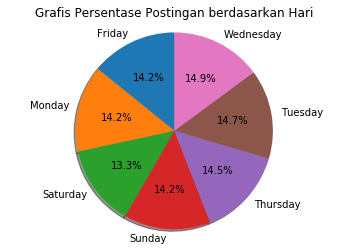

In [ ]:
labels = tweet_each_dayname_before_covid['day_name'].tolist()
sizes = tweet_each_dayname_before_covid['tweet_count'].tolist()
explode = (0, 0, 0, 0, 0, 0, 0)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

ax1.axis('equal') 

graphics_explanation('', '', 'Grafis Persentase Postingan berdasarkan Hari')

plt.show()

b. Menampilkan grafik data setiap label hari pada periode saat COVID-19

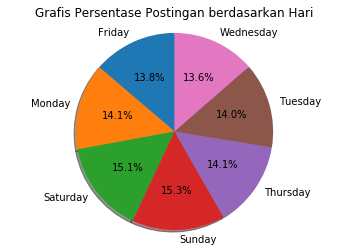

In [ ]:
labels = tweet_each_dayname_during_covid['day_name'].tolist()
sizes = tweet_each_dayname_during_covid['tweet_count'].tolist()
explode = (0, 0, 0, 0, 0, 0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 

graphics_explanation('', '', 'Grafis Persentase Postingan berdasarkan Hari')

plt.show()

Melihat perbandingan postingan ketika belum COVID-19 dan saat COVID-19

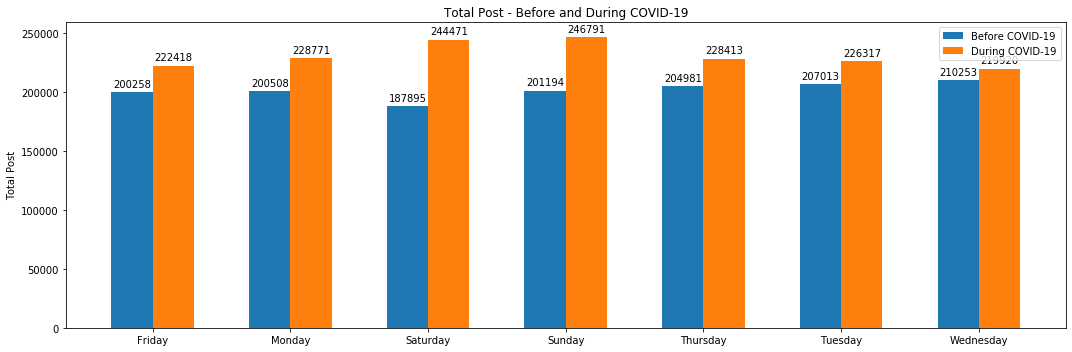

In [ ]:
day_labels = tweet_each_dayname_during_covid['day_name'].tolist()
each_day_before_covid = tweet_each_dayname_before_covid['tweet_count'].tolist()
each_day_during_covid = tweet_each_dayname_during_covid['tweet_count'].tolist()

x = np.arange(len(day_labels))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots(figsize=((15, 5)))
rects1 = ax.bar(x - width/2, each_day_before_covid, width, label='Before COVID-19')
rects2 = ax.bar(x + width/2, each_day_during_covid, width, label='During COVID-19')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Total Post')
ax.set_title('Total Post - Before and During COVID-19')
ax.set_xticks(x)
ax.set_xticklabels(day_labels)
ax.legend()

grouped_autolabel(rects1)
grouped_autolabel(rects2)

fig.tight_layout()

plt.show()

Grafik perbandingan sebelum dan saat COVID-19 berdasarkan Jam

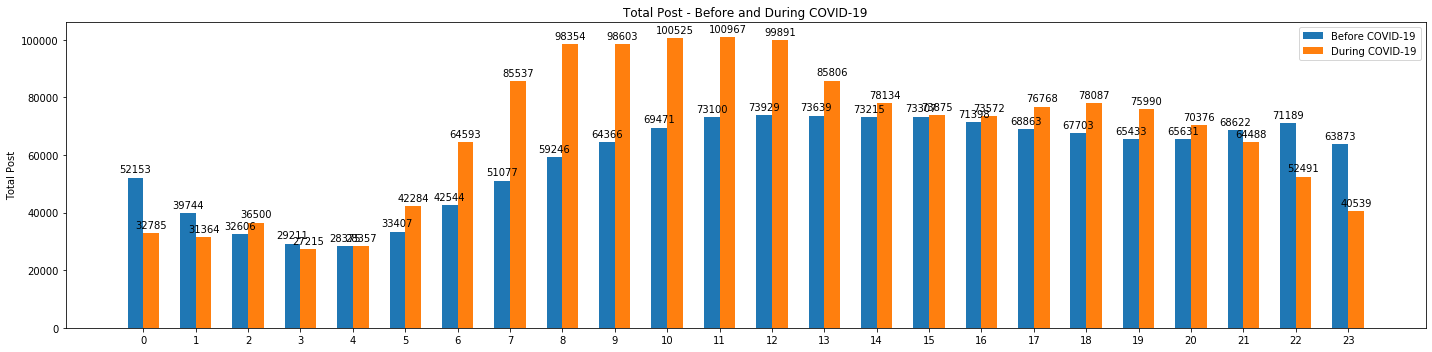

In [ ]:
time_labels = tweet_each_hour_before_covid_df.index.tolist()
each_hour_before_covid = tweet_each_hour_before_covid_df['tweet_count'].tolist()
each_hour_during_covid = tweet_each_hour_during_covid_df['tweet_count'].tolist()

x = np.arange(len(time_labels))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots(figsize=((20, 5)))
rects1 = ax.bar(x - width/2, each_hour_before_covid, width, label='Before COVID-19')
rects2 = ax.bar(x + width/2, each_hour_during_covid, width, label='During COVID-19')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Total Post')
ax.set_title('Total Post - Before and During COVID-19')
ax.set_xticks(x)
ax.set_xticklabels(time_labels)
ax.legend()

grouped_autolabel(rects1)
grouped_autolabel(rects2)

fig.tight_layout()

plt.show()

# Melakukan Filter Data berdasarkan Nilai Thresold

Membuat folder penyimpanan hasil filter

In [ ]:
import os

#create folder data before covid-19
if not os.path.exists('data/filter/noncovid'):
    os.makedirs('data/filter/noncovid')
    
#create folder data during covid-19
if not os.path.exists('data/filter/covid'):
    os.makedirs('data/filter/covid')

**Data sebelum COVID-19**

Melakukan filter data sebelum COVID-19

In [ ]:
#melakukan filter berdasarkan jumlah tweet count
tweet_each_user_before_covid = tweet_data_before_covid_df.groupby("username")["username"].count()
tweet_each_user_before_covid = pd.DataFrame(tweet_each_user_before_covid)
tweet_each_user_before_covid = tweet_each_user_before_covid.rename(columns={'username': 'tweet_count'})

tweet_each_user_before_covid.to_csv('data/filter/noncovid/tweet_count_each_user_{}-{}.csv'.format(date_start_convert_before_covid, date_end_convert_before_covid), index=True)

Menghitung jumlah pengguna aktif setiap harinya

In [ ]:
user_active_count_each_day_before_covid = tweet_data_before_covid_df.groupby("date")["username"].agg(['min','max','count','nunique'])

user_active_count_each_day_before_covid.to_csv('data/filter/noncovid/user_active_count_each_day_{}-{}.csv'.format(date_start_convert_before_covid, date_end_convert_before_covid), index=True)

Melihat nilai rata-rata data

In [ ]:
#menghitung jumlah user aktif sebelum dan saat COVID-19
user_before_covid_count = len(pd.unique(tweet_data_before_covid_df['username']))
user_during_covid_count = len(pd.unique(tweet_data_during_covid_df['username']))

#menghitung jumlah tweets per-hari
day_average_before_covid = round(tweet_each_day_before_covid_df['tweet_count'].sum()/tweet_each_day_before_covid_df['date'].count(),2)

#menghitung jumlah tweets per-orang
day_average_each_user_before_covid = round(tweet_each_user_before_covid['tweet_count'].sum()/user_before_covid_count,2)

#menghitung jumlah postingan per-jam
hour_average_before_covid = round(((tweet_each_hour_before_covid_df['tweet_count'].sum()/tweet_each_hour_before_covid_df['tweet_count'].count())/(tweet_each_day_before_covid_df['date'].count())),2)

#menghitung jumlah tweets per-minggu
week_number = (abs(date_start_before_covid - date_end_before_covid).days//7)
month_number = (abs(date_start_before_covid - date_end_before_covid).days//30)
week_average_before_covid = round(tweet_each_day_before_covid_df['tweet_count'].sum()/week_number,2)

#menghitung jumlah postingan per-bulan
month_average_before_covid = round(tweet_each_day_before_covid_df['tweet_count'].sum()/month_number,2)

#menghitung jumlah user aktif per-hari
day_user_active_before_covid = tweet_data_before_covid_df.groupby("date")["username"].count()
day_average_user_active_before_covid = round(user_active_count_each_day_before_covid['nunique'].sum()/tweet_each_day_before_covid_df['date'].count(),2)

#menghitung jumlah user aktif per-jam
hour_average_user_active_before_covid = round(user_active_count_each_day_before_covid['nunique'].sum()/(tweet_each_day_before_covid_df['date'].count()*24),2)

#menghitung jumlah user aktif per-minggu
week_average_user_active_before_covid = round(user_active_count_each_day_before_covid['nunique'].sum()/week_number,2)

#menghitung jumlah user aktif per-bulan
month_average_user_active_before_covid = round(user_active_count_each_day_before_covid['nunique'].sum()/month_number,2)

#menghitung rata-rata jumlah tweets per masing-masing pengguna berdasarkan waktu
hour_average_tweets_each_user_before_covid = round(hour_average_before_covid/hour_average_user_active_before_covid)

print('Berdasarkan Jumlah Orang')
print('Rata-rata tweets per-orang (keseluruhan data):', day_average_each_user_before_covid,'tweets')
print('Rata-rata pengguna aktif per-bulan:', month_average_user_active_before_covid, 'orang')
print('Rata-rata pengguna aktif per-minggu:', week_average_user_active_before_covid, 'orang')
print('Rata-rata pengguna aktif per-hari:', day_average_user_active_before_covid, 'orang')
print('Rata-rata pengguna aktif per-jam:', hour_average_user_active_before_covid, 'orang')
print('')
print('Rata-rata Berdasarkan Waktu:', date_start_before_covid, ' sampai', date_end_before_covid)
print('Rata-rata tweets keseluruhan:', tweet_each_user_before_covid['tweet_count'].sum(),'tweets')
print('Rata-rata tweets per-bulan:', month_average_before_covid,'tweets')
print('Rata-rata tweets per-minggu:', week_average_before_covid,'tweets')
print('Rata-rata tweets per-hari:', day_average_before_covid,'tweets')
print('Rata-rata tweets per-jam:', hour_average_before_covid,'tweets')
print('')
print('Bersadarkan Jumlah Pengguna dan Waktunya')
print('Rata-rata jumlah tweets per-jam per rata-rata pengguna:', hour_average_tweets_each_user_before_covid,'tweets')

Berdasarkan Jumlah Orang
Rata-rata tweets per-orang (keseluruhan data): 19.2 tweets
Rata-rata pengguna aktif per-bulan: 150417.0 orang
Rata-rata pengguna aktif per-minggu: 34711.62 orang
Rata-rata pengguna aktif per-hari: 5247.1 orang
Rata-rata pengguna aktif per-jam: 218.63 orang

Rata-rata Berdasarkan Waktu: 2019-12-13  sampai 2020-03-13
Rata-rata tweets keseluruhan: 1412102 tweets
Rata-rata tweets per-bulan: 470700.67 tweets
Rata-rata tweets per-minggu: 108623.23 tweets
Rata-rata tweets per-hari: 16419.79 tweets
Rata-rata tweets per-jam: 684.16 tweets

Bersadarkan Jumlah Pengguna dan Waktunya
Rata-rata jumlah tweets per-jam per rata-rata pengguna: 3.0 tweets


Mendeklarasikan nilai threesold

*nilai thresold diambil sebesar 6 tweets pada setiap harinya, dengana asumsi user yang dipilih adalah user yang minimal melakukan tweets 6 kali dalam sehari.*

In [ ]:
#mendefenisikan nilai thresold
#nilai threesold yang diambil berdasarkan jumlah postingan minimal 1 tweet per-jam
#thresold = (hour_average_tweets_each_user_before_covid*24*tweet_each_day_before_covid_df['date'].count())
#thresold = (hour_average_tweets_each_user_before_covid*24*tweet_each_day_before_covid_df['date'].count())
thresold = 6*tweet_each_day_before_covid_df['date'].count()

print(thresold)

#thresold = 4000

516


Melakukan proses filtering tweet berdasarkan nilai thresold*

*nilai threesold yang diambil berdasarkan jumlah rata-rata tweet per-jam

In [ ]:
#filter data
tweet_filter_each_user_before_covid = tweet_each_user_before_covid[tweet_each_user_before_covid['tweet_count'] > thresold]

#save to csv
tweet_filter_each_user_before_covid.to_csv('data/filter/noncovid/user_after_filter_{}-{}.csv'.format(date_start_convert_before_covid, date_end_convert_before_covid), index=True)

#tweet_filter_each_user_before_covid.count()
#tweet_filter_each_user_before_covid

Mengambil data tweet berdasarkan username yang sudah difilter

In [ ]:
#deklarasi dataframe
tweet_filter_before_covid = pd.DataFrame()

#read data csv
user_filtered_before_covid_df = pd.read_csv('data/filter/noncovid/user_after_filter_{}-{}.csv'.format(date_start_convert_before_covid, date_end_convert_before_covid))

#add tweet based on username
for index, row in user_filtered_before_covid_df.iterrows():
    
    filter_data_before_covid = tweet_data_before_covid_df[tweet_data_before_covid_df['username'] == row['username']]

    if not tweet_filter_before_covid.empty:
        tweet_filter_before_covid = tweet_filter_before_covid.append(filter_data_before_covid)
    else:
        tweet_filter_before_covid = pd.DataFrame(filter_data_before_covid)

Melakukan konversi data string ke format integer

In [ ]:
#convert nilai yang id ke bentuk integer
tweet_filter_before_covid['id'] = tweet_filter_before_covid['id'].map(int)
tweet_filter_before_covid['conversation_id'] = tweet_filter_before_covid['conversation_id'].map(int)
tweet_filter_before_covid['user_id'] = tweet_filter_before_covid['user_id'].map(int)

Menyimpan tweets hasil filter ke file CSV

In [ ]:
#save to csv
tweet_filter_before_covid.to_csv('data/filter/noncovid/tweet_after_filter__{}-{}.csv'.format(date_start_convert_before_covid, date_end_convert_before_covid), index=True)

**Data Saat COVID-19**

Melakukan filter data saat COVID-19

In [ ]:
#melakukan filter berdasarkan jumlah tweet count
tweet_each_user_during_covid = tweet_data_during_covid_df.groupby("username")["username"].count()
tweet_each_user_during_covid = pd.DataFrame(tweet_each_user_during_covid)
tweet_each_user_during_covid = tweet_each_user_during_covid.rename(columns={'username': 'tweet_count'})

tweet_each_user_during_covid.to_csv('data/filter/covid/tweet_count_each_user__{}-{}.csv'.format(date_start_convert_during_covid, date_end_convert_during_covid), index=True)

Menghitung jumlah pengguna aktif setiap harinya

In [ ]:
user_active_count_each_day_during_covid = tweet_data_during_covid_df.groupby("date")["username"].agg(['min','max','count','nunique'])

user_active_count_each_day_during_covid.to_csv('data/filter/covid/user_active_count_each_day_{}-{}.csv'.format(date_start_convert_during_covid, date_end_convert_during_covid), index=True)

Melihat nilai rata-rata

In [ ]:
#menghitung jumlah tweets per-hari
day_average_during_covid = round(tweet_each_day_during_covid_df['tweet_count'].sum()/tweet_each_day_during_covid_df['date'].count(),2)

#menghitung jumlah tweets per-orang
day_average_each_user_during_covid = round(tweet_each_user_during_covid['tweet_count'].sum()/user_during_covid_count,2)

#menghitung jumlah postingan per-jam
hour_average_during_covid = round(((tweet_each_hour_during_covid_df['tweet_count'].sum()/tweet_each_hour_during_covid_df['tweet_count'].count())/(tweet_each_day_during_covid_df['date'].count())),2)

#menghitung jumlah tweets per-minggu
week_number = (abs(date_start_during_covid - date_end_during_covid).days//7)
month_number = (abs(date_start_during_covid - date_end_during_covid).days//30)
week_average_during_covid = round(tweet_each_day_during_covid_df['tweet_count'].sum()/week_number,2)

#menghitung jumlah postingan per-bulan
month_average_during_covid = round(tweet_each_day_during_covid_df['tweet_count'].sum()/month_number,2)

#menghitung jumlah user aktif per-hari
day_user_active_during_covid = tweet_data_during_covid_df.groupby("date")["username"].count()
day_average_user_active_during_covid = round(user_active_count_each_day_during_covid['nunique'].sum()/tweet_each_day_during_covid_df['date'].count(),2)

#menghitung jumlah user aktif per-jam
hour_average_user_active_during_covid = round(user_active_count_each_day_during_covid['nunique'].sum()/(tweet_each_day_during_covid_df['date'].count()*24),2)

#menghitung jumlah user aktif per-minggu
week_average_user_active_during_covid = round(user_active_count_each_day_during_covid['nunique'].sum()/week_number,2)

#menghitung jumlah user aktif per-bulan
month_average_user_active_during_covid = round(user_active_count_each_day_during_covid['nunique'].sum()/month_number,2)

#menghitung rata-rata jumlah tweets per masing-masing pengguna berdasarkan waktu
hour_average_tweets_each_user_during_covid = round(hour_average_during_covid/hour_average_user_active_during_covid)

print('Berdasarkan Jumlah Orang')
print('Rata-rata tweets per-orang (keseluruhan data):', day_average_each_user_during_covid,'tweets')
print('Rata-rata pengguna aktif per-bulan:', month_average_user_active_during_covid, 'orang')
print('Rata-rata pengguna aktif per-minggu:', week_average_user_active_during_covid, 'orang')
print('Rata-rata pengguna aktif per-hari:', day_average_user_active_during_covid, 'orang')
print('Rata-rata pengguna aktif per-jam:', hour_average_user_active_during_covid, 'orang')
print('')
print('Rata-rata Berdasarkan Waktu:', date_start_during_covid, ' sampai', date_end_before_covid)
print('Rata-rata tweets keseluruhan:', tweet_each_user_during_covid['tweet_count'].sum(),'tweets')
print('Rata-rata tweets per-bulan:', month_average_during_covid,'tweets')
print('Rata-rata tweets per-minggu:', week_average_during_covid,'tweets')
print('Rata-rata tweets per-hari:', day_average_during_covid,'tweets')
print('Rata-rata tweets per-jam:', hour_average_during_covid,'tweets')
print('')
print('Bersadarkan Jumlah Pengguna dan Waktunya')
print('Rata-rata jumlah tweets per-jam per rata-rata pengguna:', hour_average_tweets_each_user_during_covid,'tweets')

Berdasarkan Jumlah Orang
Rata-rata tweets per-orang (keseluruhan data): 26.85 tweets
Rata-rata pengguna aktif per-bulan: 154045.67 orang
Rata-rata pengguna aktif per-minggu: 35549.0 orang
Rata-rata pengguna aktif per-hari: 4969.22 orang
Rata-rata pengguna aktif per-jam: 207.05 orang

Rata-rata Berdasarkan Waktu: 2020-03-14  sampai 2020-03-13
Rata-rata tweets keseluruhan: 1617101 tweets
Rata-rata tweets per-bulan: 539033.67 tweets
Rata-rata tweets per-minggu: 124392.38 tweets
Rata-rata tweets per-hari: 17388.18 tweets
Rata-rata tweets per-jam: 724.51 tweets

Bersadarkan Jumlah Pengguna dan Waktunya
Rata-rata jumlah tweets per-jam per rata-rata pengguna: 3.0 tweets


Mendeklarasikan nilai threesold

*nilai thresold diambil sebesar 6 tweets pada setiap harinya, dengana asumsi user yang dipilih adalah user yang minimal melakukan tweets 6 kali dalam sehari.*

In [ ]:
#mendefenisikan nilai thresold
#nilai threesold yang diambil berdasarkan jumlah postingan minimal 1 tweet per-jam
#thresold = (hour_average_tweets_each_user_before_covid*24*tweet_each_day_before_covid_df['date'].count())
#thresold = (hour_average_tweets_each_user_during_covid*24*tweet_each_day_during_covid_df['date'].count())
thresold = 6*tweet_each_day_during_covid_df['date'].count()

print(thresold)

#thresold = 4000

558


Melakukan proses filtering tweet berdasarkan nilai thresold*

*nilai threesold yang diambil berdasarkan jumlah rata-rata tweet per-jam

In [ ]:
#filter data
tweet_filter_each_user_during_covid = tweet_each_user_during_covid[tweet_each_user_during_covid['tweet_count'] > thresold]

#save to csv
tweet_filter_each_user_during_covid.to_csv('data/filter/covid/user_after_filter_{}-{}.csv'.format(date_start_convert_during_covid, date_end_convert_during_covid), index=True)

#tweet_filter_each_user_before_covid.count()
#tweet_filter_each_user_before_covid

Mengambil data tweet berdasarkan username yang sudah difilter

In [ ]:
#deklarasi dataframe
tweet_filter_during_covid = pd.DataFrame()

#read data csv
user_filtered_during_covid_df = pd.read_csv('data/filter/covid/user_after_filter_{}-{}.csv'.format(date_start_convert_during_covid, date_end_convert_during_covid))

#add tweet based on username
for index, row in user_filtered_during_covid_df.iterrows():
    
    filter_data_during_covid = tweet_data_during_covid_df[tweet_data_during_covid_df['username'] == row['username']]

    if not tweet_filter_during_covid.empty:
        tweet_filter_during_covid = tweet_filter_during_covid.append(filter_data_during_covid)
    else:
        tweet_filter_during_covid = pd.DataFrame(filter_data_during_covid)

Melakukan konversi data string ke format integer

In [ ]:
#convert nilai yang id ke bentuk integer
tweet_filter_during_covid['id'] = tweet_filter_during_covid['id'].map(int)
tweet_filter_during_covid['conversation_id'] = tweet_filter_during_covid['conversation_id'].map(int)
tweet_filter_during_covid['user_id'] = tweet_filter_during_covid['user_id'].map(int)

Menyimpan tweets hasil filter ke file CSV

In [ ]:
#save to csv
tweet_filter_during_covid.to_csv('data/filter/covid/tweet_after_filter_{}-{}.csv'.format(date_start_convert_during_covid, date_end_convert_during_covid), index=True)

Melakukan penggabungan pengguna pada periode sebelum dan saat COVID-19

In [ ]:
result = pd.concat([user_filtered_before_covid_df, user_filtered_during_covid_df], axis=1, join="outer")

print(result)

            username  tweet_count        username  tweet_count
0          1lleg1irl          692           29ras          850
1           3le4n012         1254        3le4n012          910
2           666moron          667        71arifin          765
3           71arifin          643    __supercupid          796
4            _ddevii         1189         _ddevii         1405
..               ...          ...             ...          ...
288       yaptoarie_          829    queenveee013          590
289            ynrch          661    queenyzzzzaa          950
290      yuliani2907         1025          raauwi         1667
291  zbr_berliansyah          769  rahmiputri_eka          686
292         zoelfick          787       rapriprup          726

[293 rows x 4 columns]


Melihat username yang overlaping dari periode sebelum dan saat COVID-19

In [ ]:
overlap_username = pd.DataFrame()
username_data = pd.merge(user_filtered_before_covid_df, user_filtered_during_covid_df, on=['username'], how='inner')

overlap_username = overlap_username.append(username_data)

In [ ]:
overlap_username

,username,tweet_count_x,tweet_count_y
0,3le4n012,1254,910
1,71arifin,643,765
2,_ddevii,1189,1405
3,adeemulya,862,1883
4,aditiarazak,689,1569
...,...,...,...
118,vitkasav_,758,692
119,walkingput,856,771
120,watikasbi,1093,2192
121,ynrch,661,765
